In [85]:

library(tidyverse)

DIRECTORY = 'eda'
DATASET_FILE_NAME = 'floors.csv'
DOWNLOAD_URL = 'https://raw.githubusercontent.com/IrisPereiraC/EDA-Animal-Crossing/refs/heads/main/floors.csv'

if (!dir.exists(DIRECTORY)) {
    dir.create(DIRECTORY)
    print(paste("Diretório criado:", DIRECTORY))
}

dest_path <- file.path(DIRECTORY, DATASET_FILE_NAME)
download.file(DOWNLOAD_URL, destfile = dest_path, method = "libcurl")

print(paste("Baixando para...", dest_path))
print("Concluído!")

print("Amostra:")
pisos <- read.csv(dest_path)
head(pisos)

[1] "Baixando para... eda/floors.csv"
[1] "Concluído!"
[1] "Amostra:"


,Name,VFX,DIY,Buy,Sell,Color.1,Color.2,Miles.Price,Source,Source.Notes,Version,HHA.Concept.1,HHA.Concept.2,HHA.Series,Tag,Catalog,Filename,Internal.ID,Unique.Entry.ID
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,aqua tile flooring,No,No,900,225,Light blue,Light blue,NA,Nook's Cranny,NA,1.0.0,bathroom,facility,None,Tile Floors,For sale,RoomTexFloorTile01,5036,JmNGqRhEow3PH7bgk
2,arabesque flooring,No,No,2120,530,Black,Gray,NA,Nook's Cranny,NA,1.0.0,expensive,living room,None,Cloth Floors,For sale,RoomTexFloorArabesque00,4953,4dabyuetmZD5dDdCH
3,arched-brick flooring,No,No,1100,275,Brown,Brown,NA,Nook's Cranny,NA,1.0.0,facility,shop,None,Arched Brick,For sale,RoomTexFloorArchBrick00,4998,CSPoYJzCnzWjqWrj5
4,argyle tile flooring,No,No,1750,437,White,Beige,NA,Nook's Cranny,NA,1.0.0,bathroom,facility,None,Tile Floors,For sale,RoomTexFloorTileWood00,4994,BH8PqRSou2XjQ8ppQ
5,artsy parquet flooring,No,No,1800,450,Beige,Beige,NA,Nook's Cranny,NA,1.0.0,facility,shop,None,Simple Parquet,For sale,RoomTexFloorParquetArt00,5232,fbfCzw546bWEF95Aq
6,backyard lawn,No,Yes,NFS,600,Green,Green,NA,Crafting,NA,1.0.0,garden,None,None,Grassland,Not for sale,RoomTexFloorLawn00,4979,kANgKb2s4a6pMSjnd


#=======================================
# FASE DA EXPLORAÇÃO DOS DADOS
# Descoberta e Preparação ou Tratamento
#=======================================

,Name,VFX,DIY,Buy,Sell,Color.1,Color.2,Miles.Price,Source,Source.Notes,Version,HHA.Concept.1,HHA.Concept.2,HHA.Series,Tag,Catalog,Filename,Internal.ID,Unique.Entry.ID
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,aqua tile flooring,No,No,900,225,Light blue,Light blue,NA,Nook's Cranny,NA,1.0.0,bathroom,facility,None,Tile Floors,For sale,RoomTexFloorTile01,5036,JmNGqRhEow3PH7bgk
2,arabesque flooring,No,No,2120,530,Black,Gray,NA,Nook's Cranny,NA,1.0.0,expensive,living room,None,Cloth Floors,For sale,RoomTexFloorArabesque00,4953,4dabyuetmZD5dDdCH
3,arched-brick flooring,No,No,1100,275,Brown,Brown,NA,Nook's Cranny,NA,1.0.0,facility,shop,None,Arched Brick,For sale,RoomTexFloorArchBrick00,4998,CSPoYJzCnzWjqWrj5
4,argyle tile flooring,No,No,1750,437,White,Beige,NA,Nook's Cranny,NA,1.0.0,bathroom,facility,None,Tile Floors,For sale,RoomTexFloorTileWood00,4994,BH8PqRSou2XjQ8ppQ
5,artsy parquet flooring,No,No,1800,450,Beige,Beige,NA,Nook's Cranny,NA,1.0.0,facility,shop,None,Simple Parquet,For sale,RoomTexFloorParquetArt00,5232,fbfCzw546bWEF95Aq
6,backyard lawn,No,Yes,NFS,600,Green,Green,NA,Crafting,NA,1.0.0,garden,None,None,Grassland,Not for sale,RoomTexFloorLawn00,4979,kANgKb2s4a6pMSjnd


     Name               VFX                DIY                Buy           
 Length:176         Length:176         Length:176         Length:176        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
      Sell         Color.1            Color.2           Miles.Price  
 Min.   :  120   Length:176         Length:176         Min.   :1200  
 1st Qu.:  325   Class :character   Class :character   1st Qu.:1200  
 Median :  515   Mode  :character   Mode  :character   Median :1200  
 Mean   : 1551                                         Mean   :1200  
 3rd Qu.:  750                    

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”


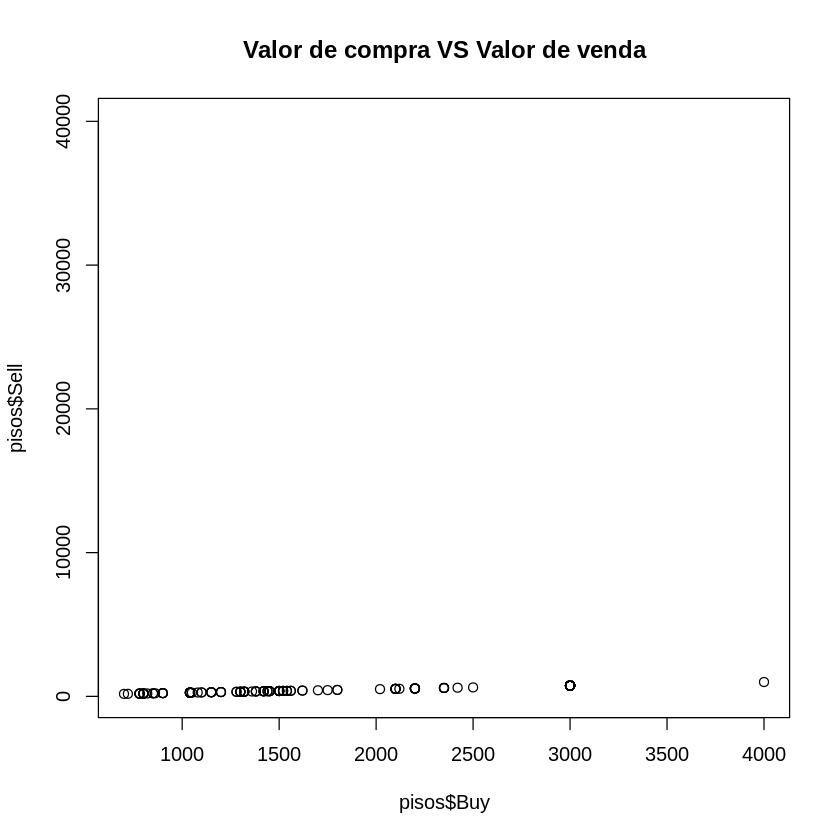

In [86]:
# Resumo
head(pisos) # Amostra
summary(pisos) # Estat. descritiva

plot(pisos$Buy, pisos$Sell,
    main = "Valor de compra VS Valor de venda")

# AGREGAÇÕES
Atribuindo raridades aos pisos por valor de compra

In [90]:
pisos$raridade <- NA

pisos$raridade <- "comum"
pisos$raridade[df$Buy > 2000] <- "incomum"
pisos$raridade[df$Buy >= 3000] <- "raro"
pisos$raridade[df$Buy >= 3500] <- "artesanal"

pisos$raridade <- factor(
  pisos$raridade,
  levels = c("comum", "incomum", "raro", "artesanal"),
  ordered = TRUE
)
table(pisos$raridade)


    comum   incomum      raro artesanal 
       65        20        44        47 

# Criação de Ranking conforme complexidade de obtenção

Tratando colunas booleanas para classificar complexidade

In [88]:
pisos$VFX <- pisos$VFX == 'Yes'
pisos$DIY <- pisos$DIY == 'Yes'
pisos$Catalog <- pisos$Catalog == 'Not for sale'

complexidade <- as.integer(pisos$VFX) + as.integer(pisos$DIY) + as.integer(pisos$Catalog)

In [108]:
complexidade[complexidade == 0] = "Baixa"
complexidade[complexidade == 1] = "Média"
complexidade[complexidade == 2] = "Alta"
complexidade[complexidade == 3] = "Extrema"

complexidade <- factor(
  complexidade,levels=c("Baixa", "Média", "Alta", "Extrema"),
  ordered = TRUE
)
pisos <- cbind(pisos, complexidade)
str(pisos$complexidade)

 Ord.factor w/ 4 levels "Baixa"<"Média"<..: 1 1 1 1 1 3 3 3 1 2 ...


# Análises e Estatística Descritiva

Raridade por meio de obtenção

In [109]:
tbl_source_raridade <- table(pisos$Source, pisos$raridade)
tbl_source_raridade

                 
                  comum incomum raro artesanal
  Birthday            0       0    0         1
  Crafting            0       0    0        24
  Nook Miles Shop     0       0    0         1
  Nook's Cranny      65      20    2        21
  Saharah             0       0   39         0
  Wedding Season      0       0    3         0

In [111]:
summary(tbl_source_raridade)

Number of cases in table: 176 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 243.32, df = 15, p-value = 2.944e-43
	Chi-squared approximation may be incorrect

In [115]:
pisos_ajustado <- data.frame(
  Nome = pisos$Name,
  ValorCompra = as.numeric(pisos$Buy),
  Origem = pisos$Source,
  Raridade = pisos$raridade,
  Complexidade = pisos$complexidade
)
summary(pisos_ajustado)

Warning message in data.frame(Nome = pisos$Name, ValorCompra = as.numeric(pisos$Buy), :
“NAs introduced by coercion”


     Nome            ValorCompra      Origem               Raridade 
 Length:176         Min.   : 700   Length:176         comum    :65  
 Class :character   1st Qu.:1200   Class :character   incomum  :20  
 Mode  :character   Median :1530   Mode  :character   raro     :44  
                    Mean   :1900                      artesanal:47  
                    3rd Qu.:3000                                    
                    Max.   :4000                                    
                    NA's   :26                                      
  Complexidade
 Baixa  :108  
 Média  : 39  
 Alta   : 24  
 Extrema:  5  
              
              
              

Percentual por complexidade

In [119]:
raridade <- table(pisos_ajustado$Raridade)
prop.table(table(raridade))
sum(raridade)

raridade
  20   44   47   65 
0.25 0.25 0.25 0.25 

[1] 176

# Visualização como análise exploratória e inferência

Plotando valor de compra vs raridade

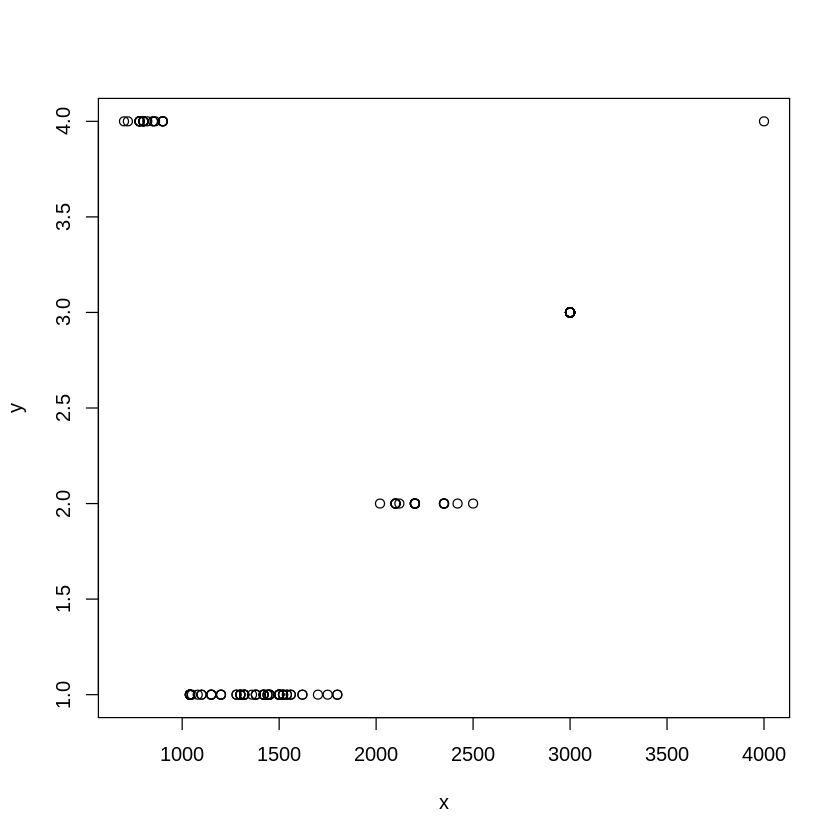

In [121]:
x <- pisos_ajustado$ValorCompra
y <- pisos_ajustado$Raridade
plot(x,y)

# Floors Data Viz

In [122]:
library(ggplot2)

Warning message:
“Removed 26 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


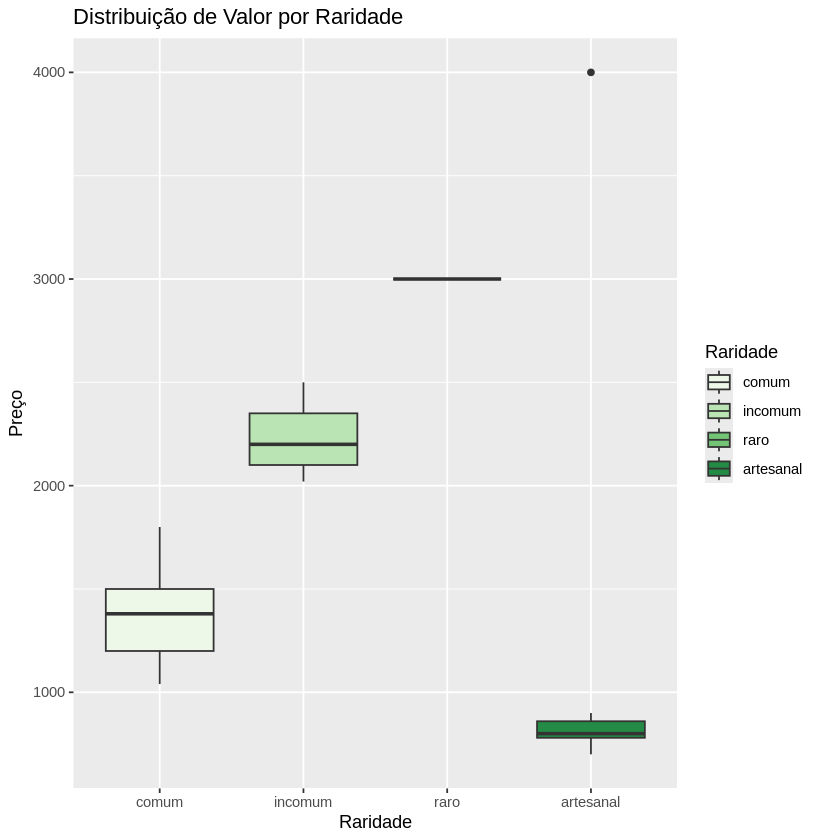

In [146]:
ggplot(pisos_ajustado, aes(x = Raridade, y = ValorCompra, fill = Raridade)) +
  geom_boxplot() +
  scale_fill_brewer(palette = "Greens") +
  labs(title = "Distribuição de Valor por Raridade", x = "Raridade", y = "Preço")

# HUM......TEM MUITO DADO DISCREPANTE
Vamos melhorar aplicando algumas técnicas matemáticas

# 1. Redução da escala usando função logarítmica - chamamos de Transformação logarítmica - outliers

Warning message:
“Removed 26 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


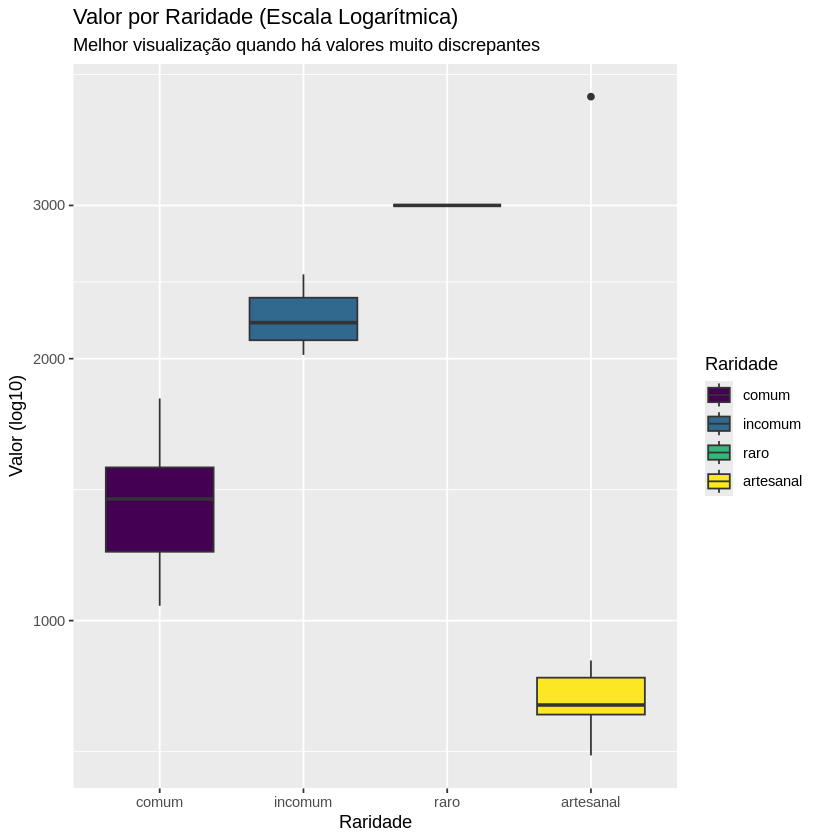

In [147]:
ggplot(pisos_ajustado, aes(x = Raridade, y = ValorCompra, fill = Raridade)) +
  geom_boxplot() +
  scale_y_log10() + # Transforma o eixo Y para escala logarítmica
  labs(title = "Valor por Raridade (Escala Logarítmica)",
       subtitle = "Melhor visualização quando há valores muito discrepantes",
       y = "Valor (log10)")

# 2. Remoção por Quartis (Método IQR)
Vamos filtrar o dataset para remover valores que estão além de 1.5 * IQR (o padrão estatístico para definir outliers).

In [149]:
quantile(pisos_ajustado$ValorCompra, .25, na.rm = TRUE)

25% 
1200

Nome,ValorCompra,Origem,Raridade,Complexidade
<chr>,<dbl>,<chr>,<ord>,<ord>
aqua tile flooring,900,Nook's Cranny,artesanal,Baixa
arabesque flooring,2120,Nook's Cranny,incomum,Baixa
arched-brick flooring,1100,Nook's Cranny,comum,Baixa
argyle tile flooring,1750,Nook's Cranny,comum,Baixa
artsy parquet flooring,1800,Nook's Cranny,comum,Baixa
beige desert-tile flooring,2100,Nook's Cranny,incomum,Baixa
birch flooring,800,Nook's Cranny,artesanal,Baixa
black iron-parquet flooring,2350,Nook's Cranny,incomum,Baixa
black-brick flooring,1040,Nook's Cranny,comum,Baixa


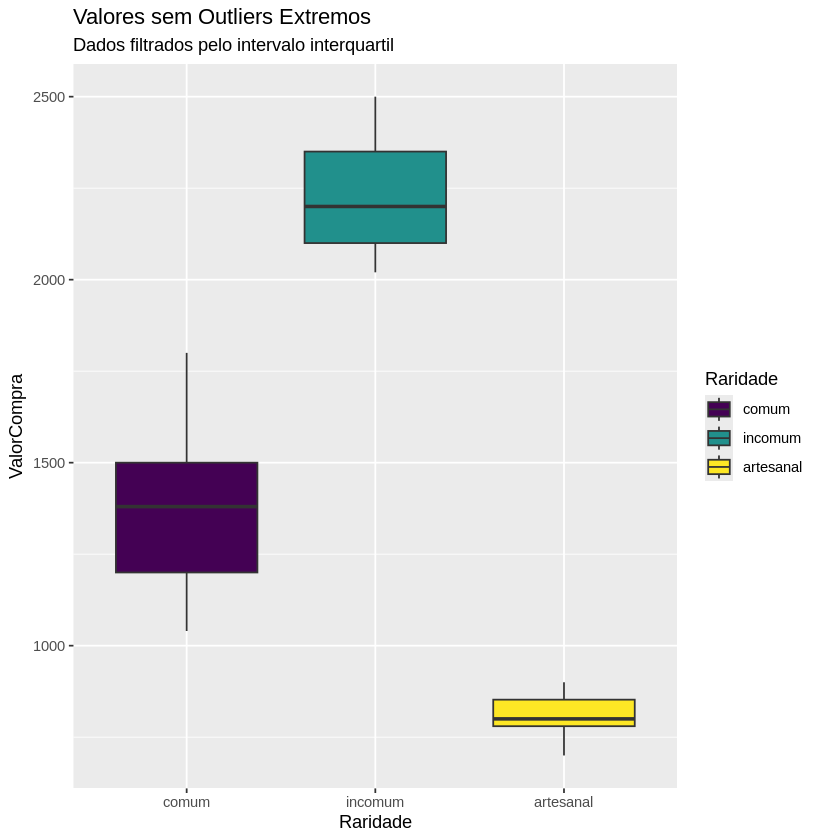

In [163]:
# Calculando os limites por grupo, removendo NA's
pisos_quart <- pisos_ajustado %>%
  group_by(Raridade) %>%
  filter(
    !is.na(ValorCompra)
  ) %>%
  filter(
    ValorCompra > (quantile(ValorCompra, .25) - 1.5 * IQR(ValorCompra)),
    ValorCompra < (quantile(ValorCompra, .75) + 1.5 * IQR(ValorCompra))

  ) %>%
  ungroup()

pisos_quart

# Plotando o gráfico sem os outliers extremos
ggplot(pisos_quart, aes(x = Raridade, y = ValorCompra, fill = Raridade)) +
  geom_boxplot(outlier.shape = NA) + # Oculta os pontos que ainda sobrarem
  labs(title = "Valores sem Outliers Extremos",
       subtitle = "Dados filtrados pelo intervalo interquartil")

# 3. Ajuste de Limites Visual (Sem deletar dados)

Se não quisermos deletar dados nem transformar a escala, podemos apenas "dar um zoom" na parte densa do gráfico.

Warning message:
“Removed 26 rows containing missing values or values outside the scale range
(`geom_point()`).”


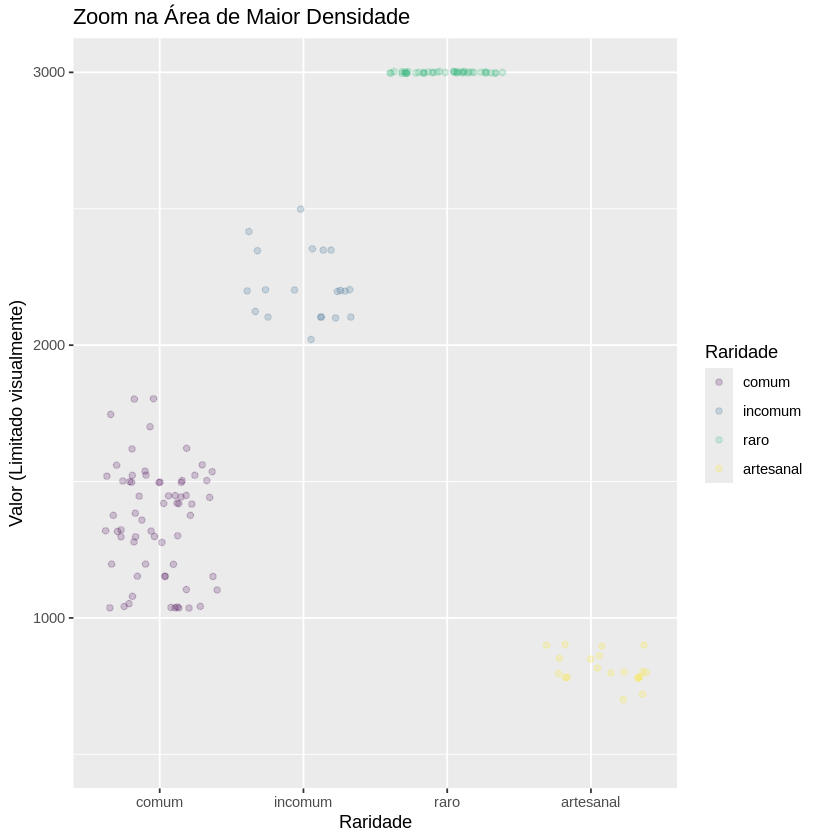

In [168]:
ggplot(pisos_ajustado, aes(x = Raridade, y = ValorCompra, color = Raridade)) +
  geom_jitter(alpha = 0.2) + # alpha 0.2 ajuda a ver a densidade com 10k pontos
  coord_cartesian(ylim = c(500, 3000)) + # Foca o gráfico onde está a maioria (ex: até 1000)
  labs(
    title = "Zoom na Área de Maior Densidade",
    y = "Valor (Limitado visualmente)"
  )

# 4. Alternativa ao Boxplot: Gráfico de Violino
Com 10.000 pontos, o Violin Plot é muitas vezes melhor que o Boxplot, pois mostra a "massa" de dados onde não há outliers.

Warning message:
“Removed 26 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


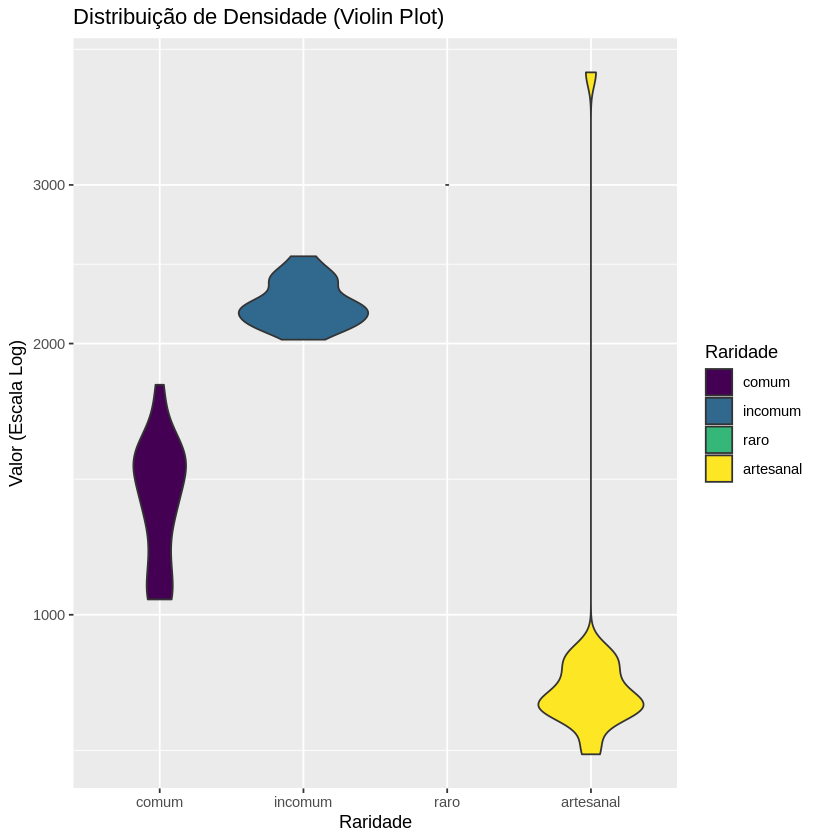

In [169]:
ggplot(pisos_ajustado, aes(x = Raridade, y = ValorCompra, fill = Raridade)) +
  geom_violin(trim = TRUE) + # trim=TRUE remove as 'pontas' finas de outliers
  scale_y_log10() +
  labs(title = "Distribuição de Densidade (Violin Plot)",
       y = "Valor (Escala Log)")

# 4. Histograma (Distribuição de Valores)
O histograma ajuda a ver a frequência dos valores. Como mostramos que há outliers, usemos aqui a escala logarítmica para o gráfico não ficar "esmagado".

Lembra uma gaussiana - material do Moodle academia Khan

Warning message:
“Removed 26 rows containing non-finite outside the scale range (`stat_bin()`).”


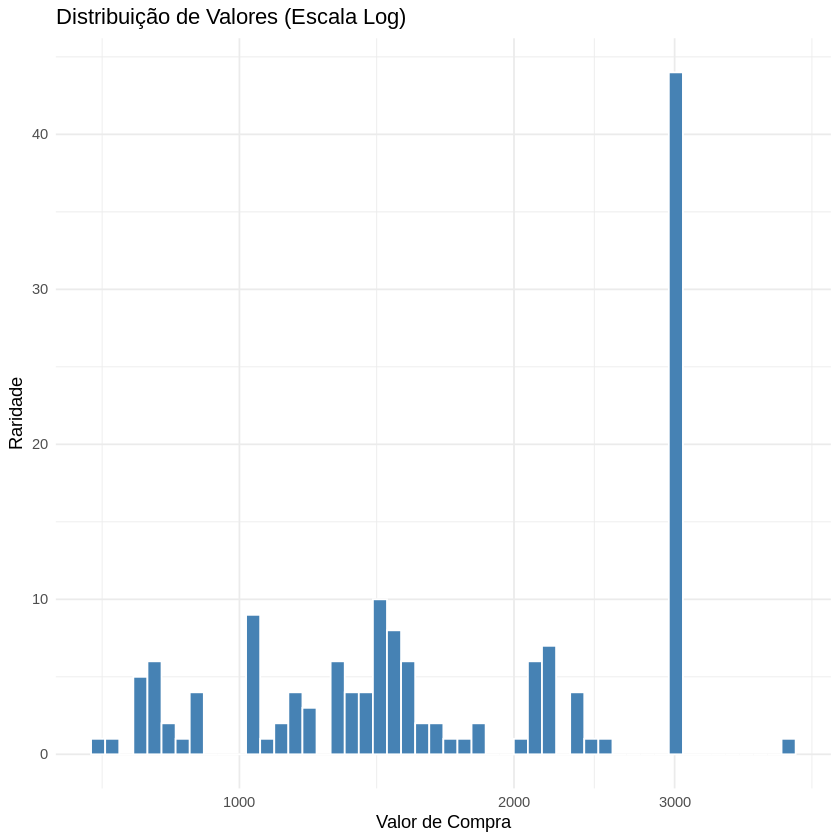

In [171]:
library(ggplot2)

ggplot(pisos_ajustado, aes(x = ValorCompra)) +
  geom_histogram(bins = 50, fill = "steelblue", color = "white") +
  scale_x_log10() + # Escala log para lidar com outliers
  labs(
    title = "Distribuição de Valores (Escala Log)", x = "Valor de Compra",
    y = "Raridade"
  ) +
  theme_minimal()

# 5. Gráfico de Linhas (Tendência)

Como a base parece não ter uma coluna de "Data" explícita, o gráfico de linha geralmente é usado para ver a relação entre o número de pedidos e o valor vendido, ou para ver a evolução se houvesse uma ordem temporal.

Warning message:
“Removed 26 rows containing non-finite outside the scale range
(`stat_summary()`).”
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Warning message:
“Removed 26 rows containing missing values or values outside the scale range
(`geom_point()`).”


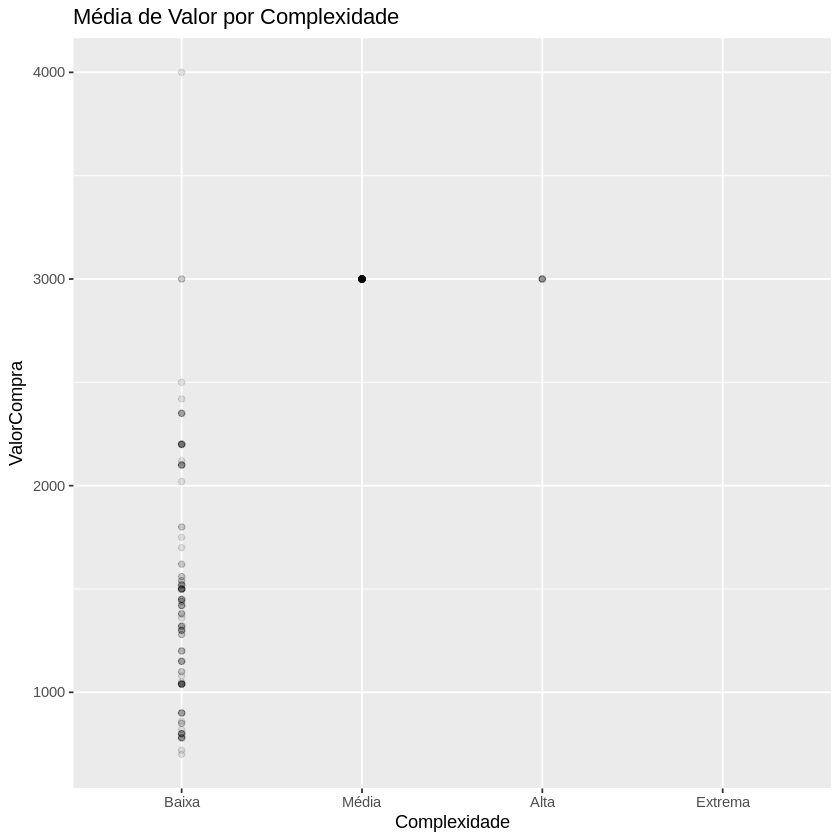

In [174]:
ggplot(pisos_ajustado, aes(x = Complexidade, y = ValorCompra)) +
  geom_line(stat = "summary", fun = "mean", color = "darkred") +
  geom_point(alpha = 0.1) +
  labs(title = "Média de Valor por Complexidade",)

# 6. Gráfico de Pizza (Proporção de Grupos)
O R base faz pizzas facilmente, mas no ggplot2 a pizza é um gráfico de barras empilhadas em coordenadas polares. Vamos ver a proporção de valor por origem

In [175]:
head(pisos_ajustado)

,Nome,ValorCompra,Origem,Raridade,Complexidade
,<chr>,<dbl>,<chr>,<ord>,<ord>
1,aqua tile flooring,900,Nook's Cranny,artesanal,Baixa
2,arabesque flooring,2120,Nook's Cranny,incomum,Baixa
3,arched-brick flooring,1100,Nook's Cranny,comum,Baixa
4,argyle tile flooring,1750,Nook's Cranny,comum,Baixa
5,artsy parquet flooring,1800,Nook's Cranny,comum,Baixa
6,backyard lawn,NA,Crafting,artesanal,Alta


Origem,Proporcao
<fct>,<int>
Birthday,1
Crafting,24
Nook Miles Shop,1
Nook's Cranny,108
Saharah,39
Wedding Season,3


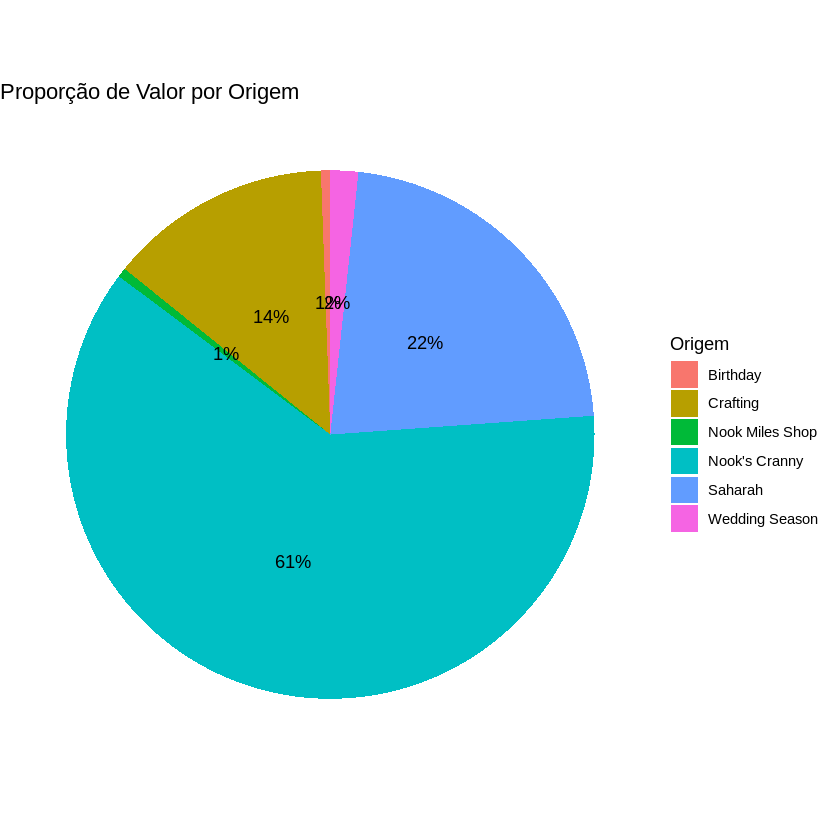

In [182]:
df_origens <- as.data.frame(table(pisos_ajustado$Origem))
colnames(df_origens) <- c("Origem", "Proporcao")
df_origens

ggplot(df_origens, aes(x= "", y = Proporcao, fill = Origem)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(title = "Proporção de Valor por Origem") +
  geom_text(
    aes(label = paste0(round(Proporcao/sum(Proporcao)*100), "%")),
    position = position_stack(vjust = 0.5)
  )

# Resumo

![image.png](attachment:7b68290e-e855-4eb9-a12d-14d33c3626d2.png)

Histograma (geom_histogram): Usado para ver em qual faixa de preço a maioria das vendas cai.

Gráfico de Linha (geom_line): Ideal para ver a evolução das vendas ou a relação média.

Gráfico de Pizza (coord_polar): Serve para comparar a fatia de mercado entre gêneros ou grupos.

# RESUM DAS FUNÇÕES ESTATÍSTICAS EMBARCADAS NAS LINGUAGENS

# ACOMPANHE AS FÓRMULAS E A ABORDAGEM NA ACADEMIA KHAN

![image.png](attachment:3ad583d8-a46b-4e41-b76e-6a03f09ec631.png)

In [ ]:
cor(x,y) # retorna a correlação entre as duas variáveis diferentes
cov(x ,y) # retorna a covariância
IQR(x) # retorna a diferença entre o 3º e 1º quartis - interquartiles
mean(x) # retorna a média
median(x) # retorna a mediana
range (x) # retrona o range mínimo e máximo
sd(x) # retorna o desvio padrão
var(x) # retorna a variância

In [ ]:
round(cov(x, y),1)
round(IQR(x),1)
round(mean(x),1)
round(median(x),1)
round(range(x),1)
round(sd(x),1)
round(var(x),1)

## Implementando um Modelo de Regressão Linear

Vamos aplicar um modelo de regressão linear para prever valores com base na raridade

In [188]:
set.seed(123) # Para reprodutibilidade
pisos_sem_na = subset(pisos_ajustado, !is.na(ValorCompra))

# Dividir os dados em conjuntos de treinamento (70%) e teste (30%)
index <- sample(1:nrow(pisos_sem_na), 0.7 * nrow(pisos_ajustado))
train_data <- pisos_sem_na[index, ]
test_data <- pisos_sem_na[-index, ]

print("Dimensões dos dados de treinamento:")
print(dim(train_data))
print("Dimensões dos dados de teste:")
print(dim(test_data))

[1] "Dimensões dos dados de treinamento:"
[1] 123   5
[1] "Dimensões dos dados de teste:"
[1] 27  5


In [189]:
head(train_data)

,Nome,ValorCompra,Origem,Raridade,Complexidade
,<chr>,<dbl>,<chr>,<ord>,<ord>
17,blue floral flooring,1520,Nook's Cranny,comum,Baixa
56,dark-block flooring,1380,Nook's Cranny,comum,Baixa
136,Saharah's desert,3000,Saharah,raro,Média
49,cute white-tile flooring,780,Nook's Cranny,artesanal,Baixa
176,zebra-print flooring,1300,Nook's Cranny,comum,Baixa
174,wooden-knot flooring,780,Nook's Cranny,artesanal,Baixa


In [190]:
head(test_data)

,Nome,ValorCompra,Origem,Raridade,Complexidade
,<chr>,<dbl>,<chr>,<ord>,<ord>
1,aqua tile flooring,900,Nook's Cranny,artesanal,Baixa
2,arabesque flooring,2120,Nook's Cranny,incomum,Baixa
3,arched-brick flooring,1100,Nook's Cranny,comum,Baixa
21,blue-paint flooring,1040,Nook's Cranny,comum,Baixa
22,boxing-ring mat,3000,Saharah,raro,Média
33,cloud flooring,3000,Saharah,raro,Alta


### Treinamento do Modelo de Regressão Linear

Utilizaremos a função `lm()` para criar o modelo, onde `ValorCompra` é a variável dependente e `Raridade` é a variável independente.

In [191]:
model <- lm(ValorCompra ~ Raridade, data = train_data)

# Exibir um resumo do modelo
summary(model)


Call:
lm(formula = ValorCompra ~ Raridade, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-320.71 -132.31    0.00   59.29 3012.22 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1895.20      33.59  56.414  < 2e-16 ***
Raridade.L    -78.51      62.29  -1.260     0.21    
Raridade.Q  -1441.91      67.19 -21.461  < 2e-16 ***
Raridade.C   -598.37      71.75  -8.339 1.52e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 318.4 on 119 degrees of freedom
Multiple R-squared:  0.8633,	Adjusted R-squared:  0.8599 
F-statistic: 250.5 on 3 and 119 DF,  p-value: < 2.2e-16


### Avaliação do Modelo

Agora vamos usar o modelo treinado para fazer previsões no conjunto de teste e avaliar seu desempenho.

[1] "Erro Médio Absoluto (MAE): 115.54"
[1] "Raiz do Erro Quadrático Médio (RMSE): 155.72"


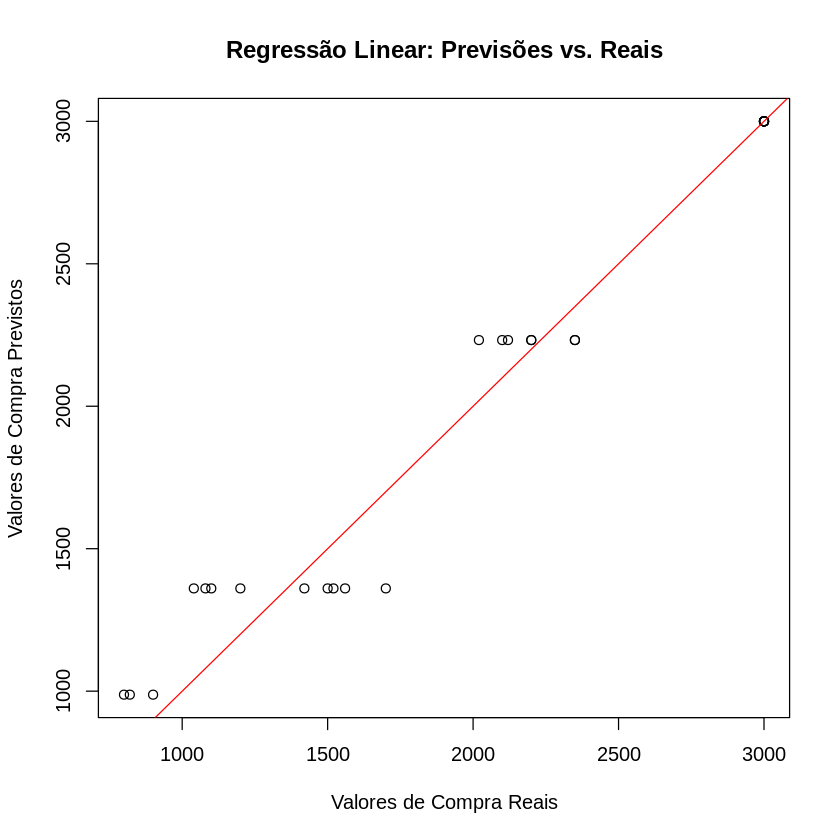

In [192]:
predictions <- predict(model, newdata = test_data)

# Calcular Erro Médio Absoluto (MAE) e Raiz do Erro Quadrático Médio (RMSE)
MAE <- mean(abs(predictions - test_data$ValorCompra))
RMSE <- sqrt(mean((predictions - test_data$ValorCompra)^2))

print(paste("Erro Médio Absoluto (MAE):", round(MAE, 2)))
print(paste("Raiz do Erro Quadrático Médio (RMSE):", round(RMSE, 2)))

# Plotar as previsões vs. valores reais
plot(test_data$ValorCompra, predictions,
     xlab = "Valores de Compra Reais",
     ylab = "Valores de Compra Previstos",
     main = "Regressão Linear: Previsões vs. Reais")
abline(0, 1, col = "red") # Linha de 45 graus para comparação ideal

A partir da projeção do modelo, podemos observar forte correção entre o valor de um piso e sua raridade.

Um valor de 0.8633 para o R-quadrado reforça essa constatação, colocando a raridade como um dos principais fatores para a variação do preço, com 86% de impacto.

As previsões deste modelo se divergem da realidade em 115.54 unidades (MAE). Sua baixa diferença em relação ao RMSE - que mede 155.72 unidades - ajuda a embasar a solidez do modelo.

Por fim, podemos concluir alta consistência da regressão proposta, onde a raridade é um indicador adequado para compreender a variância no valor de um piso.

O modelo de aprendizado de máquina é supervisionado
